<a href="https://colab.research.google.com/github/tren03/ML-Mini-Projects/blob/main/Pytorch/Pytorch_module_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

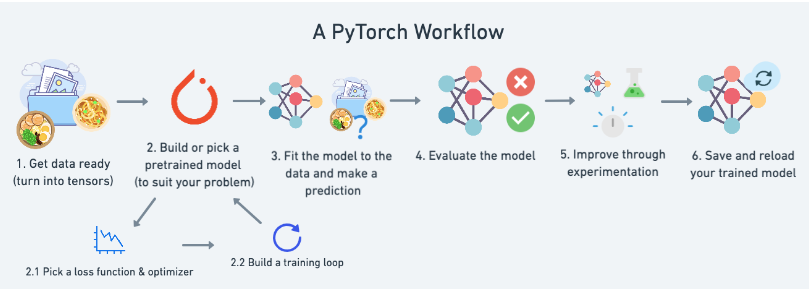

1. Getting data ready modules - torchvision.transforms, torch.utils.data.Dataset, torch.utils.data.DataLoader
2. Building model and picking loss function
  - torch.nn
  - torch.nn.Module
  - torchvision.models(pre trained models)
  - optimizing(torch.optim)
4. Evaluating model - torchmetrics
5. Improve through experimentation - torch.utils.tensorboard

In [ ]:
import torch
from torch import nn #nn contains all of pytorch building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__ #checking version of pytorch


'2.1.0+cu118'

## 1. Data preparing and loading
data can be
excel,images,videos,audio,DNA,text

1. machine learning invlolves getting data into numbers
2. Building model to learn patterns in numbers


In [ ]:
#create known parameters (y=wx+b)
weight = 0.7
bias = 0.3

#creating data
start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1) #creates a 1D tensor with values between start and stop incremented by step
#unsqueeze converts the 1D vector into 2D
y = weight*X+bias
X[:10],y[:10] #displaying X and y

#we are going to build a model to look at x and learn what is related y value, the regression relationship above is the expected output

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
len(X)
len(y)

50

##Splitting data into training and testing sets

In [ ]:
#generalization - ability of model to perform on data it has not seen before
#creating training/test split
#validation set not used often

train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

#later, we use sckit learn's train test split function to split data
len(X_train),len(X_test),len(y_train),len(y_test)



(40, 10, 40, 10)

In [ ]:
#visualizing the data
#plots training anb test data
def plot_prediction(train_data = X_train,train_labels=y_train,test_data=X_test,test_labels=y_test,predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data,train_labels,c="b",s=4,label="Training data") #plotting train in blue
  plt.scatter(test_data,test_labels,c="g",s=4,label="Testing data") #plotting test in green
  if predictions is not None:
    plt.scatter(test_data,predictions,c="r",s=4,label="predictions") #plotting predicitons if we get some from the model for test data in red
  plt.legend(prop={"size":14})

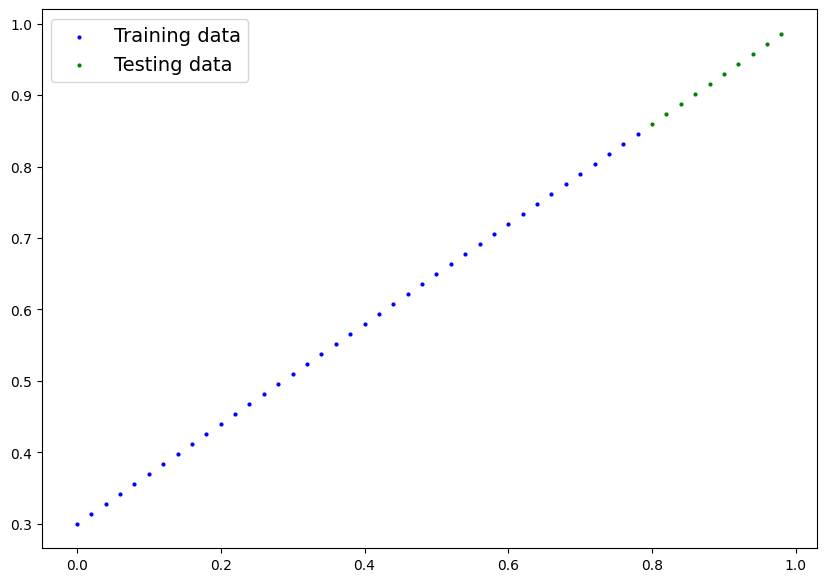

In [ ]:
plot_prediction()

## 2. Build model


In [ ]:
# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model, any subclass of nn.module needs to override forward function
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

What is nn.parameter()

I will break it down for you. Tensors, as you might know, are multi dimensional matrices. Parameter, in its raw form, is a tensor i.e. a multi dimensional matrix. It sub-classes the Variable class.

The difference between a Variable and a Parameter comes in when associated with a module. When a Parameter is associated with a module as a model attribute, it gets added to the parameter list automatically and can be accessed using the 'parameters' iterator.

Initially in Torch, a Variable (which could for example be an intermediate state) would also get added as a parameter of the model upon assignment. Later on there were use cases identified where a need to cache the variables instead of having them added to the parameter list was identified.

Our model starts with random values, weights and bias and adjusts random values to get closer to ideal values
Using 2 main algorithms
1. Gradient descent https://www.youtube.com/watch?v=IHZwWFHWa-w (finds min in gradient)

2. Backpropogation https://www.youtube.com/watch?v=Ilg3gGewQ5U (creates a gradient)

Extra book http://neuralnetworksanddeeplearning.com/


##Pytorch model building essentials

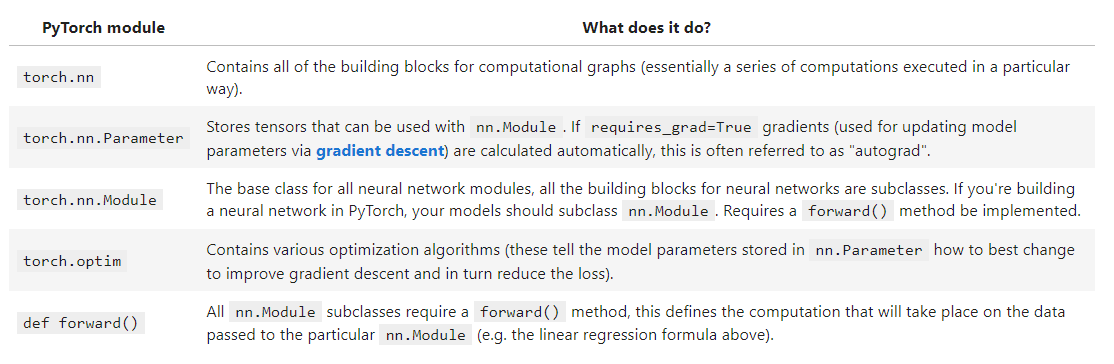

and torch.utils.data.Dataset and torch.utils.data.DataLoader

In [ ]:
# Set manual seed since nn.Parameter are randomly initialzied
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module that contains nn.Parameter(s))
model_0 = LinearRegressionModel()

# Check the nn.Parameter(s) within the nn.Module subclass we created
list(model_0.parameters())

# List named parameters
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

##Making predictions using torch.inference_mode()
torch.inference_mode() turns off a bunch of things (like gradient tracking, which is necessary for training but not for inference) to make forward-passes (data going through the forward() method) faster.

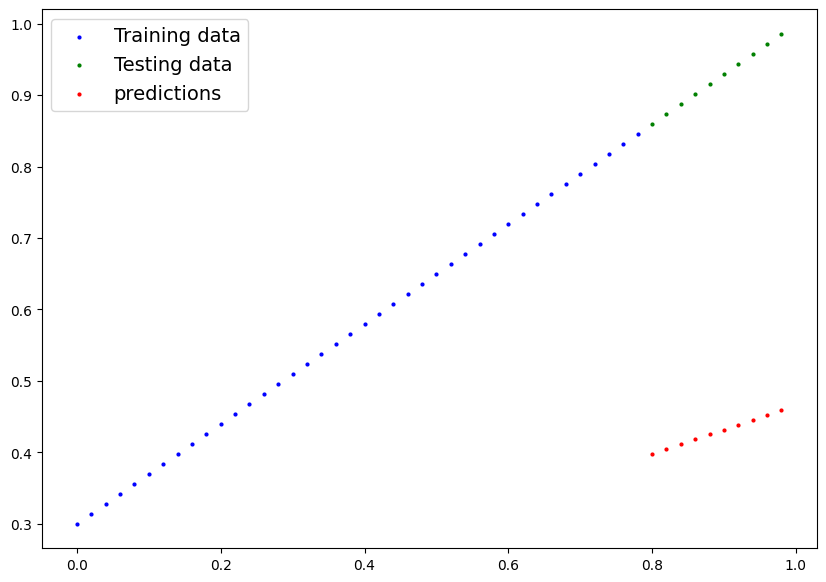

In [ ]:
# Make predictions with model
with torch.inference_mode():
  y_preds = model_0(X_test)

# Note: in older PyTorch code you might also see torch.no_grad()
# with torch.no_grad():
#   y_preds = model_0(X_test)



plot_prediction(predictions=y_preds)

##Training data
Loss function
  - Measures how wrong your models predictions (e.g. y_preds) are compared to the truth labels (e.g. y_test). Lower the better.
  - PyTorch has plenty of built-in loss functions in torch.nn.
  - Loss function checks difference between a single predicted and test value while cost function is average of all loss functions for the model
  - Mean absolute error (MAE) for regression problems (torch.nn.L1Loss()). Binary cross entropy for binary classification problems (torch.nn.BCELoss()).
  - Lower is better

Optimizer
  - Takes into acccount the loss of model and adjust the parameters accordingly
  - You can find various optimization function implementations in torch.optim.
  - Stochastic gradient descent (torch.optim.SGD()). Adam optimizer (torch.optim.Adam()).
  - Inside optimizer, we often set 2 parameters
    - params = model parameter you like to optimize
    - lr(learning rate) - hyperparameter(a parameter the developer sets)  whihc defines how big/small the optimizer changes the parameter in each step

In pytorch, we need
  - training loop
  - testing loop

nn.L1Loss, nn.MSELoss - for regression problems

nn.BCELoss - binary cross entropy loss used for classification problems








In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [ ]:
#Setup a Loss function
loss_fn = nn.L1Loss()

#Setup a optimizer
#https://pytorch.org/docs/stable/optim.html
#sgd and adam most popular.
# Create the optimizer
optimizer = torch.optim.SGD(params=model_0.parameters(), # parameters of target model to optimize
                            lr=0.005) # learning rate (how much the optimizer should change parameters at each step, higher=more (less stable), lower=less (might take a long time))

## Building training and testing loop

Things we need in a training loop
0. Loop through data
1. Forward pass (this involves data moving thorough "forward()" functions) to make prediction about the data - also called forward propogation
2. Calculate the loss (compare forward pass prediction to ground truth labels)
3. Optimizer zero grad
4. Loss backward - moves backwards through the network to calculate the gradient of each of the parameters of our model wrt the loss (backpropogation)
5. Optimizer step - use the optimizer to adjust out model's parameters to try and improve the loss (gradient descent)

In [ ]:
torch.manual_seed(42)

# Set the number of epochs (how many times the model will pass over the training data)
epochs = 200

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    ### Training

    # Put model in training mode (this is the default state of a model)
    model_0.train()

    # 1. Forward pass on train data using the forward() method inside
    y_pred = model_0(X_train)
    # print(y_pred)

    # 2. Calculate the loss (how different are our models predictions to the ground truth)
    loss = loss_fn(y_pred, y_train)

    # 3. Zero grad of the optimizer
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Progress the optimizer
    optimizer.step()

    ### Testing

    # Put the model in evaluation mode(turns off features needed only for training)
    model_0.eval()

    with torch.inference_mode():
      # 1. Forward pass on test data
      test_pred = model_0(X_test)

      # 2. Caculate loss on test data
      test_loss = loss_fn(test_pred, y_test.type(torch.float)) # predictions come in torch.float datatype, so comparisons need to be done with tensors of the same type

      # Print out what's happening
      if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")

Epoch: 0 | MAE Train Loss: 0.001977377338334918 | MAE Test Loss: 0.0024690269492566586 
Epoch: 10 | MAE Train Loss: 0.001977377338334918 | MAE Test Loss: 0.0024690269492566586 
Epoch: 20 | MAE Train Loss: 0.001977377338334918 | MAE Test Loss: 0.0024690269492566586 
Epoch: 30 | MAE Train Loss: 0.001977377338334918 | MAE Test Loss: 0.0024690269492566586 
Epoch: 40 | MAE Train Loss: 0.001977377338334918 | MAE Test Loss: 0.0024690269492566586 
Epoch: 50 | MAE Train Loss: 0.001977377338334918 | MAE Test Loss: 0.0024690269492566586 
Epoch: 60 | MAE Train Loss: 0.001977377338334918 | MAE Test Loss: 0.0024690269492566586 
Epoch: 70 | MAE Train Loss: 0.001977377338334918 | MAE Test Loss: 0.0024690269492566586 
Epoch: 80 | MAE Train Loss: 0.001977377338334918 | MAE Test Loss: 0.0024690269492566586 
Epoch: 90 | MAE Train Loss: 0.001977377338334918 | MAE Test Loss: 0.0024690269492566586 
Epoch: 100 | MAE Train Loss: 0.001977377338334918 | MAE Test Loss: 0.0024690269492566586 
Epoch: 110 | MAE Trai

OrderedDict([('weights', tensor([0.6954])), ('bias', tensor([0.2998]))])

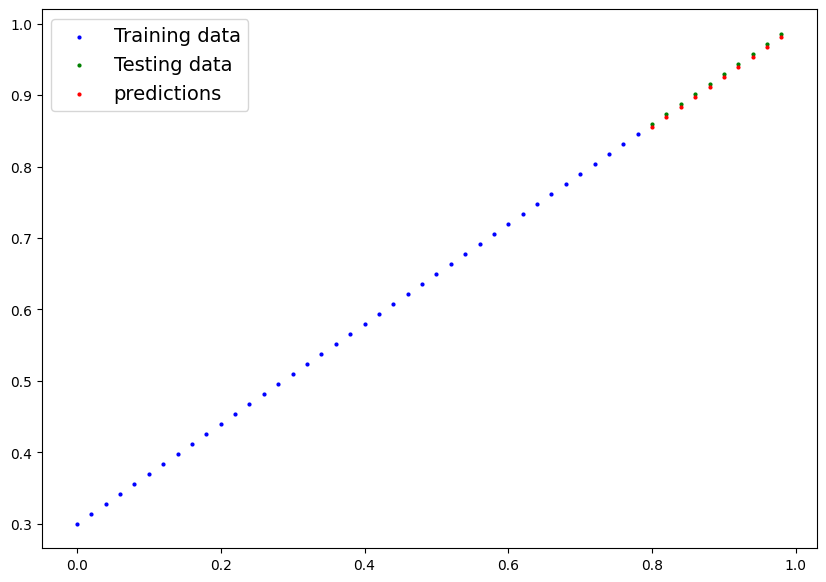

In [ ]:
with torch.inference_mode():
  y_pred=model_0(X_test)

plot_prediction(predictions=y_pred)
model_0.state_dict()

##Saving a model in pytorch
Three main methods there for saving and loading in Pytorch
1. 'torch.save()' - allows us to save a Pytorch object in python's pickel format
2. 'torch.load()' - allows us to load Pytorch object
3. 'torch.nn.Module.load_state_dict()' - allows us to load model's saved state dictionary

Documentaation - https://pytorch.org/tutorials/beginner/saving_loading_models.html

In [ ]:
# if we disconnect to collab, we loose the training so we need to save the model in pytorch
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01.pth" #pytorch objects have extension .pth or .pt
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)



Saving model to: models/01.pth


# Loading a pytorch model

In [ ]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModel()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

<All keys matched successfully>

OrderedDict([('weights', tensor([0.6954])), ('bias', tensor([0.2998]))])

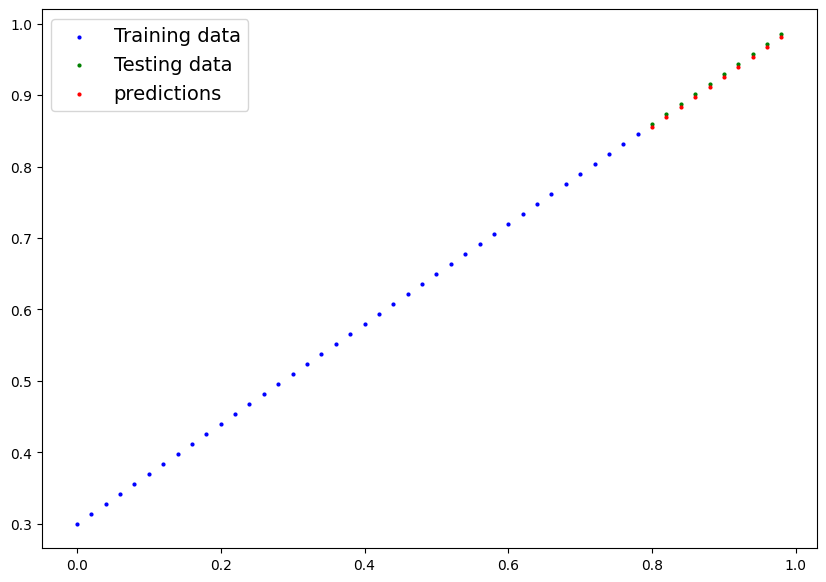

In [ ]:
## making predictions with loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_pred = loaded_model_1(X_test)

plot_prediction(predictions=loaded_model_pred)
loaded_model_1.state_dict()


# Practice


In [ ]:
#Practicing all steps

In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt


Create device-agnostic code
If we have access to GPU, we use that, else default to CPU

In [ ]:
#Setting up device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device : {device}")
#For using GPU - go to runtime and change runtime type

using device : cuda


In [ ]:
#Getting data
weightp = 0.7
biasp = 0.3

start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weightp * X + biasp



In [ ]:
#Splitting data
train_split = int(0.8*len(X))
X_train,y_train = X[:train_split],y[:train_split]
X_test,y_test = X[train_split:],y[train_split:]

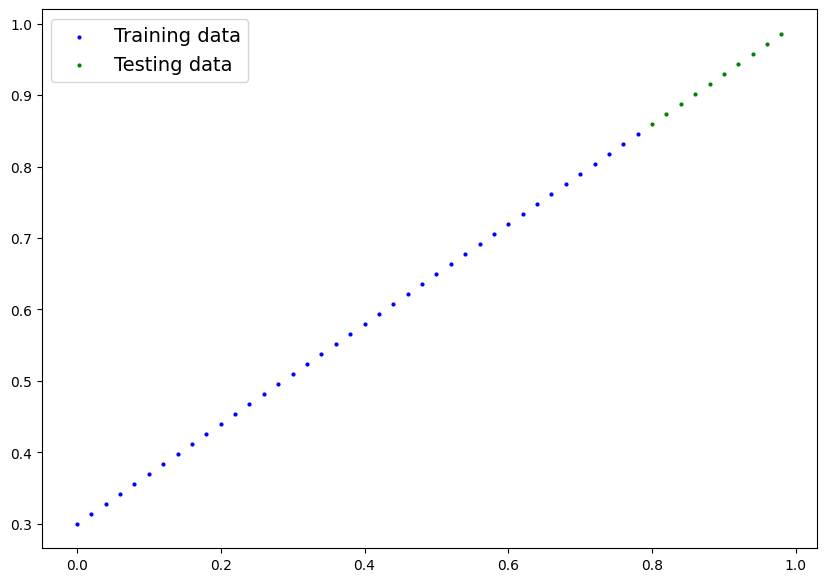

In [ ]:
plot_prediction(X_train,y_train,X_test,y_test)

In [ ]:
#Creating model
class LinearReg(nn.Module):
  def __init__(self):
    super().__init__()
    #using nn.Linear() for creating model parameters, it also implements linear regression, we created a layer containing our parameters
    self.linear_layer = nn.Linear(in_features=1,out_features=1) #we take one input x and one output y (think that we only created one neuron)


  def forward(self,x: torch.Tensor) -> torch.Tensor:
    return self.linear_layer(x)




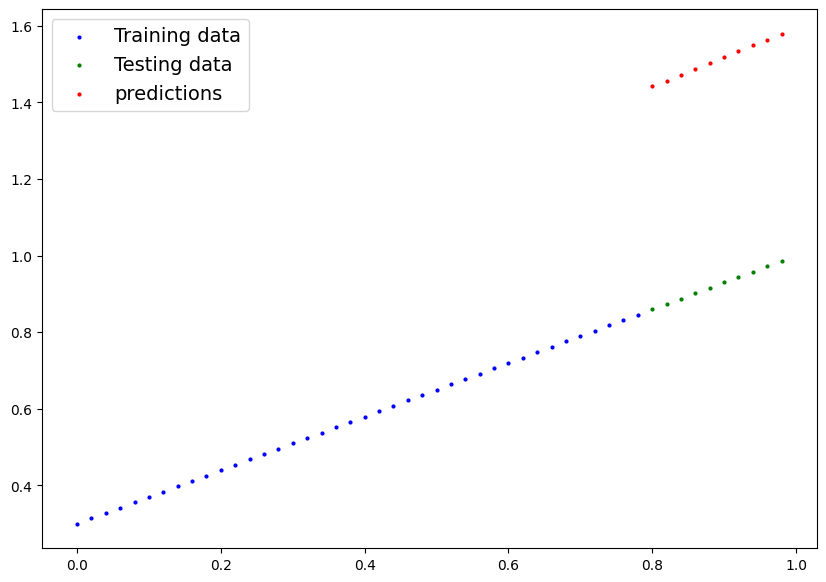

In [ ]:
torch.manual_seed(42)
#without manual seed
#checking model working
model_prac = LinearReg()
# model_prac.eval()
with torch.inference_mode():
  y_pred_check = model_prac(X_test)

plot_prediction(predictions=y_pred_check)

In [ ]:
model_prac.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params = model_prac.parameters(),lr=0.01)

In [ ]:
#building train and test loop
ep=[]
train_loss=[]
test_loss=[]
epochs = 200
for epoch in range(epochs):
  model_prac.train()
  y_pred_train = model_prac(X_train)
  tr_loss = loss_fn(y_pred_train,y_train)
  optimizer.zero_grad()
  tr_loss.backward()
  optimizer.step()

  model_prac.eval()
  with torch.inference_mode():
    y_pred_test = model_prac(X_test)
    te_loss = loss_fn(y_pred_test,y_test)
    if(epoch%10==0):
      ep.append(epoch)
      train_loss.append(tr_loss)
      test_loss.append(te_loss)

for i in range(len(ep)):
  print(f"epoch = {ep[i]} train loss = {train_loss[i]} test loss = {test_loss[i]}")





epoch = 0 train loss = 0.0012645035749301314 test loss = 0.013801807537674904
epoch = 10 train loss = 0.0012645035749301314 test loss = 0.013801807537674904
epoch = 20 train loss = 0.0012645035749301314 test loss = 0.013801807537674904
epoch = 30 train loss = 0.0012645035749301314 test loss = 0.013801807537674904
epoch = 40 train loss = 0.0012645035749301314 test loss = 0.013801807537674904
epoch = 50 train loss = 0.0012645035749301314 test loss = 0.013801807537674904
epoch = 60 train loss = 0.0012645035749301314 test loss = 0.013801807537674904
epoch = 70 train loss = 0.0012645035749301314 test loss = 0.013801807537674904
epoch = 80 train loss = 0.0012645035749301314 test loss = 0.013801807537674904
epoch = 90 train loss = 0.0012645035749301314 test loss = 0.013801807537674904
epoch = 100 train loss = 0.0012645035749301314 test loss = 0.013801807537674904
epoch = 110 train loss = 0.0012645035749301314 test loss = 0.013801807537674904
epoch = 120 train loss = 0.0012645035749301314 test

In [ ]:
model_prac.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])

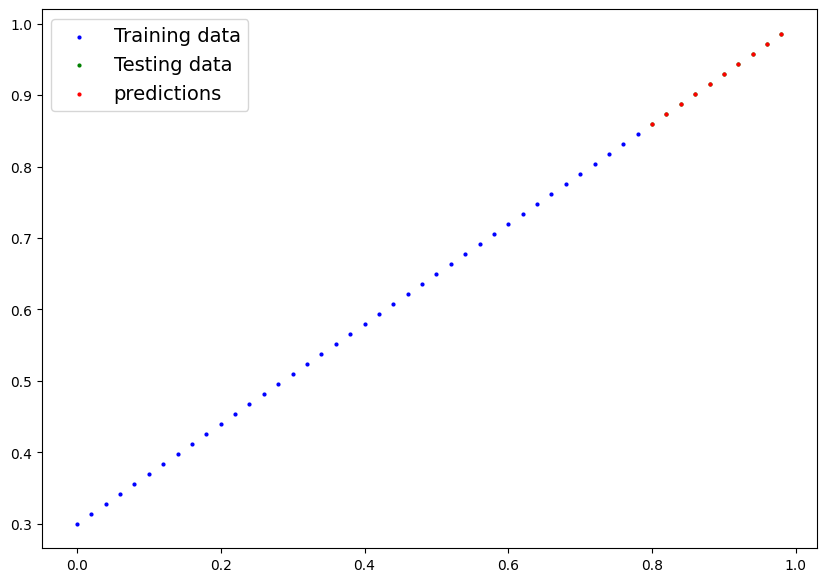

In [ ]:
model_prac.eval()
with torch.inference_mode():
  y_preds_final = model_prac(X_test)

plot_prediction(predictions=y_preds_final)

In [ ]:
y_preds_final

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]])

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,exist_ok=True)
MODEL_NAME = "model_prac.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_PATH

torch.save(obj=model_prac.state_dict(),f=MODEL_SAVE_PATH)

In [ ]:
#loading model
loaded_model_prac = LinearReg()
loaded_model_prac.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_prac.state_dict()


OrderedDict([('linear_layer.weight', tensor([[0.6968]])),
             ('linear_layer.bias', tensor([0.3025]))])